<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/NLP/notebooks/CH18_NLP_Chinese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('tripadvisor.xlsx', parse_dates=['date'])
df.head()

,uid,rating,date,title,content
0,Kay C,4,2019-09-05,"還行, 回程延遲",位置空間還不錯。餐點也很可以。3-3機位。清潔度很不錯。對小朋友也還可以。出發的時間很準時。...
1,MinJer Lai,3,2019-09-05,空服員訓練仍有不足,"台北紐約航段有一個點心餐和兩個正餐, 點心餐就是堅果包和飲料\n在第一個正餐,我們被告知沒有..."
2,Rui,3,2019-09-04,舊機型沒個人娛樂、回程魚肉飯好吃,舊機型沒個人娛樂，只有抬頭電視可以看公放的電影、回程魚肉飯好吃。颱風剛過有小延誤，高的人坐起...
3,gigil169,4,2019-08-23,"準點, 對之前的猶豫已一掃而空","真的沒有讓人失望, 之前只坐過一次, 但還是會猶豫不決, 最後因為航班選擇比較多, 彈性大一..."
4,Wei-hsiang,4,2019-08-20,舒適,舒適平穩，並且提供餐點供乘客享用，座位上亦提供薄毯避免乘客受寒，座位前方有休閒娛樂系統，其中...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   uid      2557 non-null   object        
 1   rating   2557 non-null   int64         
 2   date     2557 non-null   datetime64[ns]
 3   title    2557 non-null   object        
 4   content  2557 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 100.0+ KB


In [3]:
size = df['rating'].value_counts().sort_index()
pct = df['rating'].value_counts(normalize=True).round(2).sort_index()
pd.DataFrame(zip(size, pct), columns=['次數', '百分比'], index=range(1,6))

,次數,百分比
1,52,0.02
2,72,0.03
3,287,0.11
4,1019,0.40
5,1127,0.44


In [4]:
df.groupby(df['date'].dt.year)['rating'].agg(['size','mean'])


,size,mean
date,,
2016,810,4.251852
2017,795,4.270440
2018,685,4.144526
2019,267,4.082397


In [5]:
import jieba
# 載入繁體字典
jieba.set_dictionary('dict.txt.big')
print(list(jieba.cut('下雨天留客天留我不留')))
# 將串列組合回字串，用空白做區隔
s = ' '.join(jieba.cut('下雨天留客天留我不留'))
print(s)

Building prefix dict from /content/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
Loading model cost 1.782 seconds.
Prefix dict has been built successfully.


['下雨天', '留客', '天留', '我', '不留']
下雨天 留客 天留 我 不留


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform([s])
pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())

,下雨天,不留,天留,留客
0,1,1,1,1


In [7]:
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bow = cv.fit_transform([s])
pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())

,下雨天,不留,天留,我,留客
0,1,1,1,1,1


In [8]:
df.loc[0, 'content']

'位置空間還不錯。餐點也很可以。3-3機位。清潔度很不錯。對小朋友也還可以。出發的時間很準時。但是回程就碰上延遲, 約40分鐘。沒有個人娛樂設施。'

In [9]:
s = ' '.join(jieba.cut(df.iloc[0]['content']))
s

'位置 空間 還 不錯 。 餐點 也 很 可以 。 3 - 3 機位 。 清潔度 很 不錯 。 對 小朋友 也還 可以 。 出發 的 時間 很 準時 。 但是 回程 就 碰上 延遲 ,   約 40 分鐘 。 沒有 個人 娛樂 設施 。'

In [10]:
# 從檔案讀入停用字，並做成串列
with open('stop.text','r', encoding='utf-8') as f:
    stops = f.read()
stops = stops.split('\n')

cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b', 
                     stop_words=stops)
bow = cv.fit_transform([s])
print(cv.get_feature_names())

['40', '不錯', '也還', '位置', '個人', '出發', '分鐘', '回程', '娛樂', '小朋友', '延遲', '時間', '機位', '沒有', '清潔度', '準時', '碰上', '空間', '約', '設施', '餐點']


In [11]:
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b', 
                     stop_words=stops, 
                     ngram_range=(1,2))
bow = cv.fit_transform([s])
print(cv.get_feature_names())

['40', '40 分鐘', '不錯', '不錯 小朋友', '不錯 餐點', '也還', '也還 出發', '位置', '位置 空間', '個人', '個人 娛樂', '出發', '出發 時間', '分鐘', '分鐘 沒有', '回程', '回程 碰上', '娛樂', '娛樂 設施', '小朋友', '小朋友 也還', '延遲', '延遲 約', '時間', '時間 準時', '機位', '機位 清潔度', '沒有', '沒有 個人', '清潔度', '清潔度 不錯', '準時', '準時 回程', '碰上', '碰上 延遲', '空間', '空間 不錯', '約', '約 40', '設施', '餐點', '餐點 機位']


In [12]:
df['rating'] = (df['rating'] > 3).map({True:1 , False:0})
df['rating'].value_counts()

1    2146
0     411
Name: rating, dtype: int64

In [13]:
X = df['content']
y = df['rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [14]:
def preprocessor(s):
    return ' '.join(jieba.cut(s))

print('斷字函數的結果：', preprocessor('下雨天留客天留我不留'))
cv = CountVectorizer(preprocessor=preprocessor,    
    token_pattern='(?u)\\b\\w+\\b', 
    stop_words=stops)
bow = cv.fit_transform(['下雨天留客天留我不留'])
pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())

斷字函數的結果： 下雨天 留客 天留 我 不留


,下雨天,不留,天留,留客
0,1,1,1,1


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cv = CountVectorizer(preprocessor=preprocessor,    
    token_pattern='(?u)\\b\\w+\\b', 
    stop_words=stops)
model_pl = make_pipeline(cv, MultinomialNB())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
score = model_pl.score(X_test, y_test)
print('測試集的結果', score.round(3))
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

測試集的結果 0.844
[[ 14  73]
 [  7 418]]
綜合報告
              precision    recall  f1-score   support

           0       0.67      0.16      0.26        87
           1       0.85      0.98      0.91       425

    accuracy                           0.84       512
   macro avg       0.76      0.57      0.59       512
weighted avg       0.82      0.84      0.80       512



In [16]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

np.random.seed(42)
model_pl = make_pipeline(cv, RandomUnderSampler(), MultinomialNB())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
score = model_pl.score(X_test, y_test)
print('測試集的結果', score.round(3))
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

測試集的結果 0.695
[[ 63  24]
 [132 293]]
綜合報告
              precision    recall  f1-score   support

           0       0.32      0.72      0.45        87
           1       0.92      0.69      0.79       425

    accuracy                           0.70       512
   macro avg       0.62      0.71      0.62       512
weighted avg       0.82      0.70      0.73       512



In [17]:
from imblearn.over_sampling import SMOTE
np.random.seed(42)
model_pl = make_pipeline(cv, SMOTE(), MultinomialNB())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
score = model_pl.score(X_test, y_test)
print('測試集的結果', score.round(3))
y_pred = model_pl.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

測試集的結果 0.846
[[ 29  58]
 [ 21 404]]
綜合報告
              precision    recall  f1-score   support

           0       0.58      0.33      0.42        87
           1       0.87      0.95      0.91       425

    accuracy                           0.85       512
   macro avg       0.73      0.64      0.67       512
weighted avg       0.82      0.85      0.83       512



In [18]:
df['title'].head()

0            還行, 回程延遲
1           空服員訓練仍有不足
2    舊機型沒個人娛樂、回程魚肉飯好吃
3     準點, 對之前的猶豫已一掃而空
4                  舒適
Name: title, dtype: object

In [19]:
from sklearn.compose import ColumnTransformer
X = df[['title', 'content']]
cv = CountVectorizer(preprocessor=preprocessor,    
    token_pattern='(?u)\\b\\w+\\b',
    stop_words=stops)
data_pl = ColumnTransformer([
    ('title', cv, 'title'),
    ('content', cv, 'content')
])
data_pl.fit_transform(X).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pl = make_pipeline(data_pl, 
                         RandomUnderSampler(),
                         MultinomialNB())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
score = model_pl.score(X_test, y_test)
print('測試集的結果', score.round(3))
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

測試集的結果 0.727
[[ 63  24]
 [116 309]]
綜合報告
              precision    recall  f1-score   support

           0       0.35      0.72      0.47        87
           1       0.93      0.73      0.82       425

    accuracy                           0.73       512
   macro avg       0.64      0.73      0.64       512
weighted avg       0.83      0.73      0.76       512



In [21]:
model_pl = make_pipeline(data_pl, 
                         SMOTE(),
                         MultinomialNB())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
score = model_pl.score(X_test, y_test)
print('測試集的結果', score.round(3))
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

測試集的結果 0.855
[[ 28  59]
 [ 15 410]]
綜合報告
              precision    recall  f1-score   support

           0       0.65      0.32      0.43        87
           1       0.87      0.96      0.92       425

    accuracy                           0.86       512
   macro avg       0.76      0.64      0.67       512
weighted avg       0.84      0.86      0.83       512



In [22]:
n_topics = 12
n_words = 10
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
cv = CountVectorizer(preprocessor=preprocessor, 
                     token_pattern='(?u)\\b\\w+\\b', 
                     stop_words=stops, 
                     max_df=0.5)
X_array = cv.fit_transform(df['content'])
X_topics = lda.fit_transform(X_array)
idx = cv.get_feature_names()

pd.DataFrame(lda.components_[0], index=idx, columns=['topic']).\
sort_values(by='topic', ascending=False)[:n_words]

,topic
華航,414.820222
飛機,295.689754
沒有,183.318666
餐點,175.180108
服務,164.010307
經濟艙,158.915209
搭,141.386442
座位,138.433124
搭乘,133.009091
班機,119.728409


In [23]:
words = {}
for topic in range(n_topics):
    word = pd.DataFrame(lda.components_[topic], index=idx).\
            sort_values(by=0, ascending=False)[:n_words].index.tolist()
    words[f'主題{topic+1}'] = word
pd.DataFrame(words)

,主題1,主題2,主題3,主題4,主題5,主題6,主題7,主題8,主題9,主題10,主題11,主題12
0,華航,服務,一個,一个,服務,機上,長榮,飛機,時間,機場,飛機,長榮
1,飛機,長榮,航空公司,他们,非常,餐點,服務,長榮,旅客,台北,服務,餐點
2,沒有,航空,食物,飞机,飛機,服務,飛機,航空,服務,航班,餐點,搭乘
3,餐點,餐點,飛機,食物,人員,飛機,航空,沒有,吃,小時,比較,服務
4,服務,不錯,航班,航班,很棒,親切,航空公司,時間,班機,台灣,機上,航空
5,經濟艙,親切,座位,航空公司,航班,非常,旅客,航空公司,機上,kitty,設備,不錯
6,搭,搭乘,非常,我们,一個,航空,餐點,餐,小時,華航,航空,空姐
7,座位,艙,服務,真的,這是,好吃,搭,服務,機場,改,華航,沒有
8,搭乘,人員,很棒,更,座位,餐,會,座位,會,hello,長榮,機上
9,班機,飛機,沒有,座位,親切,人員,班機,坐,態度,通知,台灣,座位


In [24]:
cv = CountVectorizer(preprocessor=preprocessor, 
                     token_pattern='(?u)\\b\\w+\\b', 
                     stop_words=stops, max_df=0.5)
bow = cv.fit_transform(df['content'])
df_bow = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
df_bow.head()

,00,000,01,01Jan,02,03,04,05,06,07,08,0800,0950,10,100,1000,100ml,105,1061118,107,11,1100,1130,12,1200,121,12K,12hr,13,135,13H,14,140,14hr,14hrs,15,1500,15000,15000TWD,152,...,點解,點評,點贊,點選,點酒,點頭,點餐,點點,鼎泰豐,鼓勵,鼓足勇氣,鼻子,齊,齊備,齊全,齣,龍蝦,龍道,龜山島,龜裂,０,１,２,３,４,５,６,７,８,９,Ａ,Ｂ,Ｃ,Ｎ,Ｐ,Ｒ,ｋ,ｏ,𣈱,𥚃
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


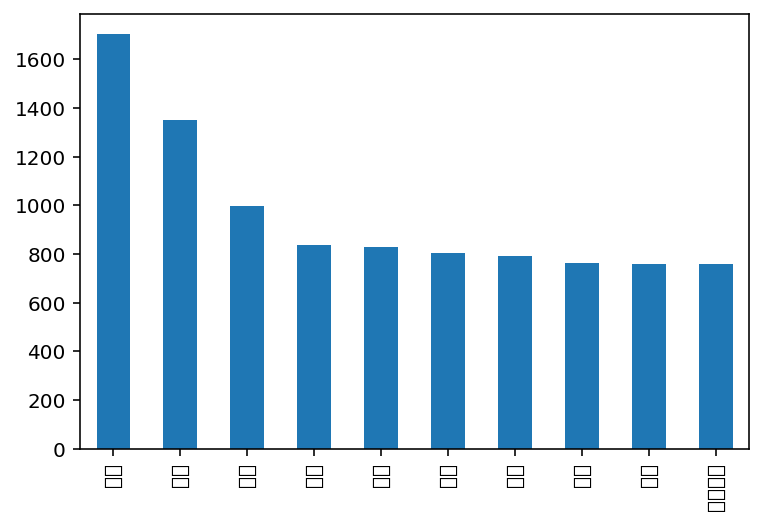

In [25]:
df_bow.sum().sort_values(ascending=False)[:10].plot(kind='bar');

In [26]:
dat =df_bow.sum()

In [27]:
!pip install wordcloud
!pip install jieba

In [31]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image

alice_mask = np.array(Image.open("cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, 
               mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(df_bow.sum())   #df_bow.sum())
wc.to_file("cloud.png")

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

OSError: ignored